# Build a model to do crime classification, analysis & prediction in Indore city.

# Objective: -

With the rapid urbanization and development of big cities and towns, the graph of crimes is also on the increase. This phenomenal rise in offences and crime in cities is a matter of great concern and alarm to all of us. There are robberies, murders, rapes and what not. The frequent and repeated thefts, burglaries, robberies, murders, killings, rapes, shoplifting, pick pocketing, drug- abuse, illegal trafficking, smuggling, theft of vehicles etc., have made the common citizens to have 
sleepless nights and restless days. They feel very insecure and vulnerable in the presence of anti-social and evil elements. The criminals have been operating in an organized way and sometimes even have nationwide and international connections and links.

The goal of this challenge is to build a machine learning model that predicts the surges and hotspots of crime. It helps in understanding patterns of criminal behavior that could help in solving criminal investigations.

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [20]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [21]:
#loading the dataset
try:
    df=pd.read_csv('F:\ML models\Crime Prediction\Data\data.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [22]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772


# Dataset: -

Attribute Information:
1. Act379
2. Act13
3. Act279
4. Act323
5. Act363
6. Act302

**Ten real-valued features are computed for each cell nucleus:**

1. Timestamp
2. Latitude
3. Longitude

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [23]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 2090 rows and 9 columns


#### By analysing the problem statement and the dataset, we get to know that the target variables are " act379, act13, act279, act323, act363, act302 " columns which shows the whether the crime occur or not.

In [24]:
for i in df.select_dtypes(include=['int64']).columns:
    print(i)
    print(df[i].value_counts())
    print("---------------------------")

act379
0    1694
1     396
Name: act379, dtype: int64
---------------------------
act13
0    2002
1      88
Name: act13, dtype: int64
---------------------------
act279
0    1408
1     682
Name: act279, dtype: int64
---------------------------
act323
0    1298
1     792
Name: act323, dtype: int64
---------------------------
act363
0    1980
1     110
Name: act363, dtype: int64
---------------------------
act302
0    2068
1      22
Name: act302, dtype: int64
---------------------------


#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [26]:
df.shape

(2090, 9)

#### The df.shape method shows the shape of the dataset. 

We can identify that their are 2090 rows and 9 columns.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  2090 non-null   object 
 1   act379     2090 non-null   int64  
 2   act13      2090 non-null   int64  
 3   act279     2090 non-null   int64  
 4   act323     2090 non-null   int64  
 5   act363     2090 non-null   int64  
 6   act302     2090 non-null   int64  
 7   latitude   2090 non-null   float64
 8   longitude  2090 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 147.1+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [28]:
df.iloc[1]

timestamp    28-02-2018 21:15
act379                      1
act13                       0
act279                      0
act323                      0
act363                      0
act302                      0
latitude            22.720992
longitude           75.876083
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [29]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [30]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  1
There names are as follows:  ['timestamp']


In [31]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [32]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  6
There names are as follows:  ['act379', 'act13', 'act279', 'act323', 'act363', 'act302']


In [33]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [34]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  2
There name are as follow:  ['latitude', 'longitude']


## Step 2 Insights: -

1) We have total 9 features where 6 of them is integer type, 1 are object type while others are float type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [35]:
df.describe()

,act379,act13,act279,act323,act363,act302,latitude,longitude
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,0.189474,0.042105,0.326316,0.378947,0.052632,0.010526,22.716464,75.855261
std,0.391978,0.200877,0.468977,0.485241,0.223350,0.102081,0.050563,0.059993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.531931,75.542195
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.700700,75.836600
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.720000,75.860581
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,22.738098,75.885012
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.929638,76.032055


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

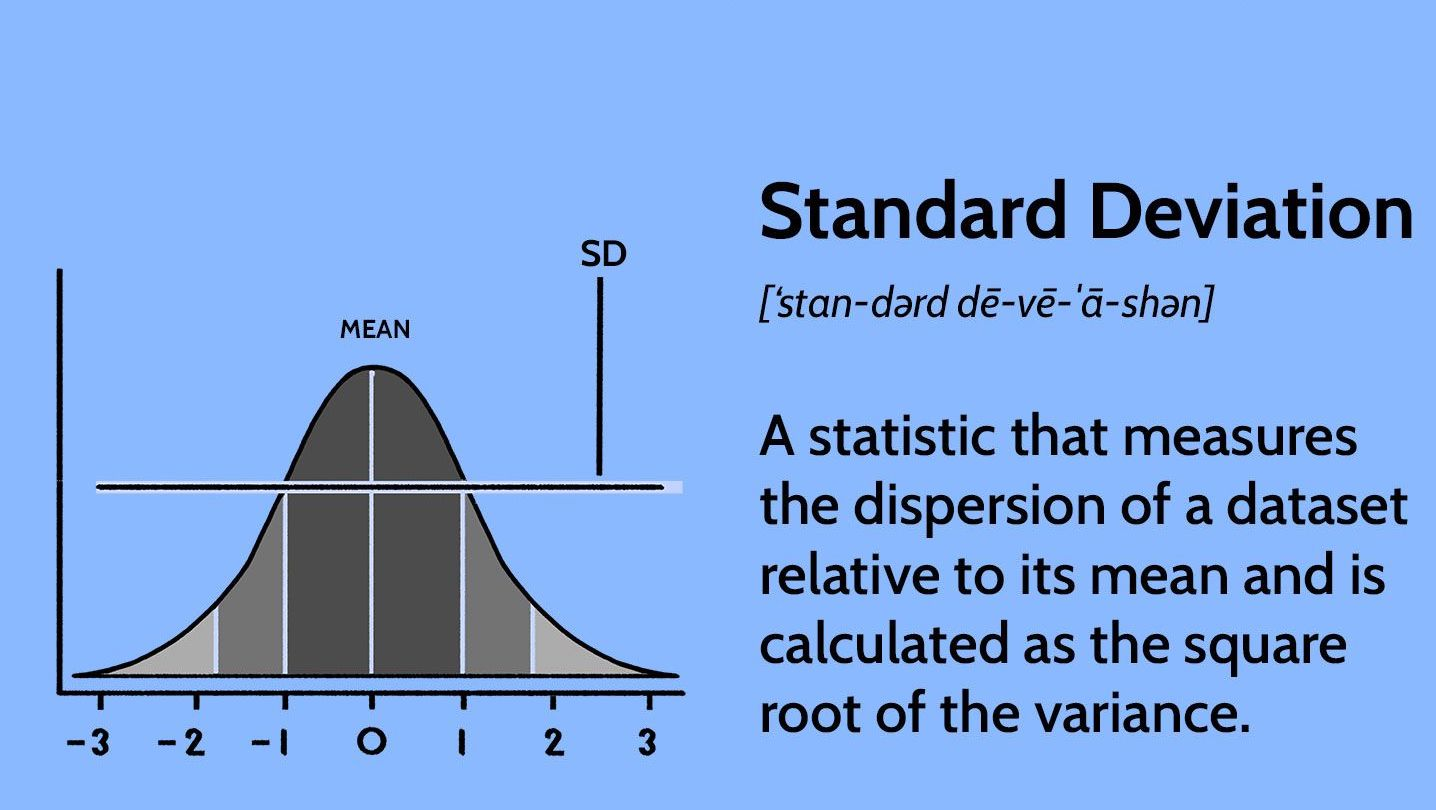

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [36]:
df.std()

act379       0.391978
act13        0.200877
act279       0.468977
act323       0.485241
act363       0.223350
act302       0.102081
latitude     0.050563
longitude    0.059993
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [37]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [38]:
std_cal(df, float64_lst)

,normal_value,zero_value
0,2,0


In [39]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

,normal_value,zero_value
0,6,0


zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

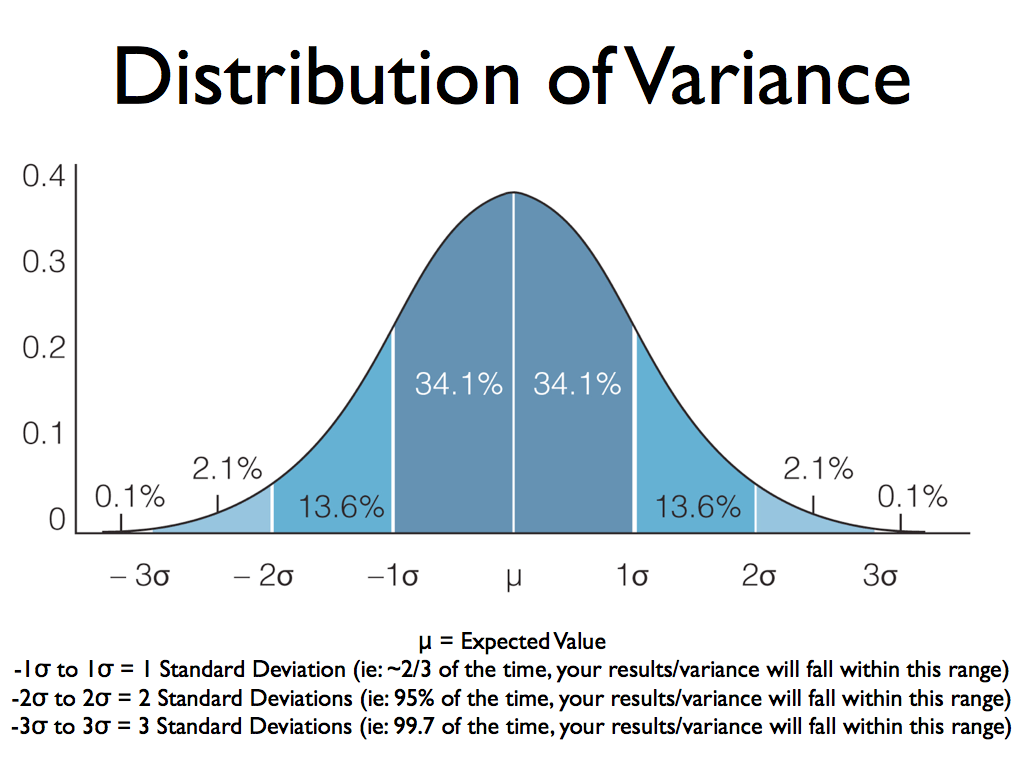

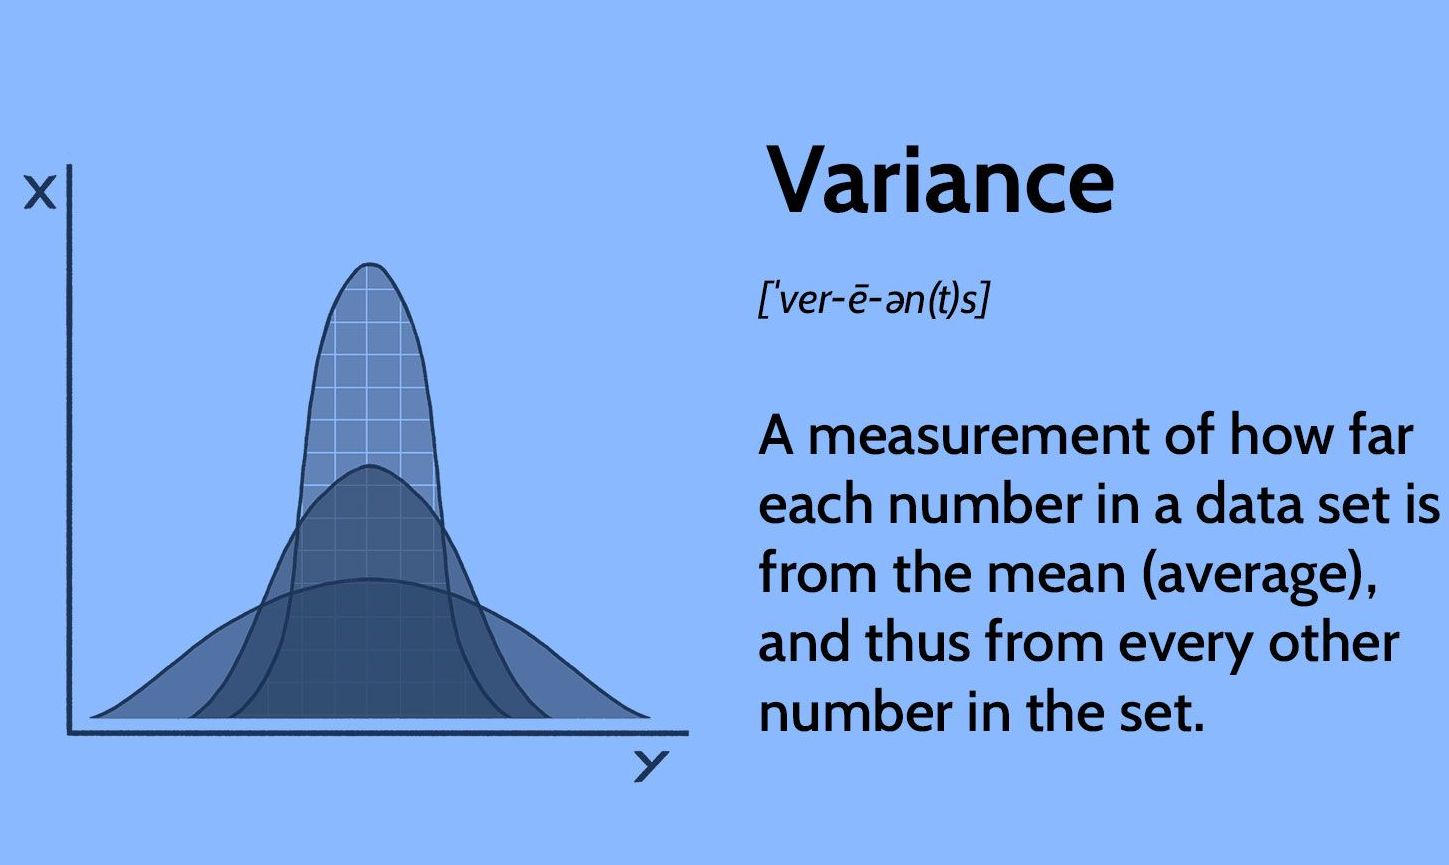

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [40]:
df.var()

act379       0.153647
act13        0.040352
act279       0.219939
act323       0.235459
act363       0.049885
act302       0.010420
latitude     0.002557
longitude    0.003599
dtype: float64

#### We can also understand the Variance using the below function.

In [41]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [42]:
var_cal(df, float64_lst)

,normal_value,zero_value
0,2,0


In [43]:
var_cal(df, int64_lst)

,normal_value,zero_value
0,6,0


zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

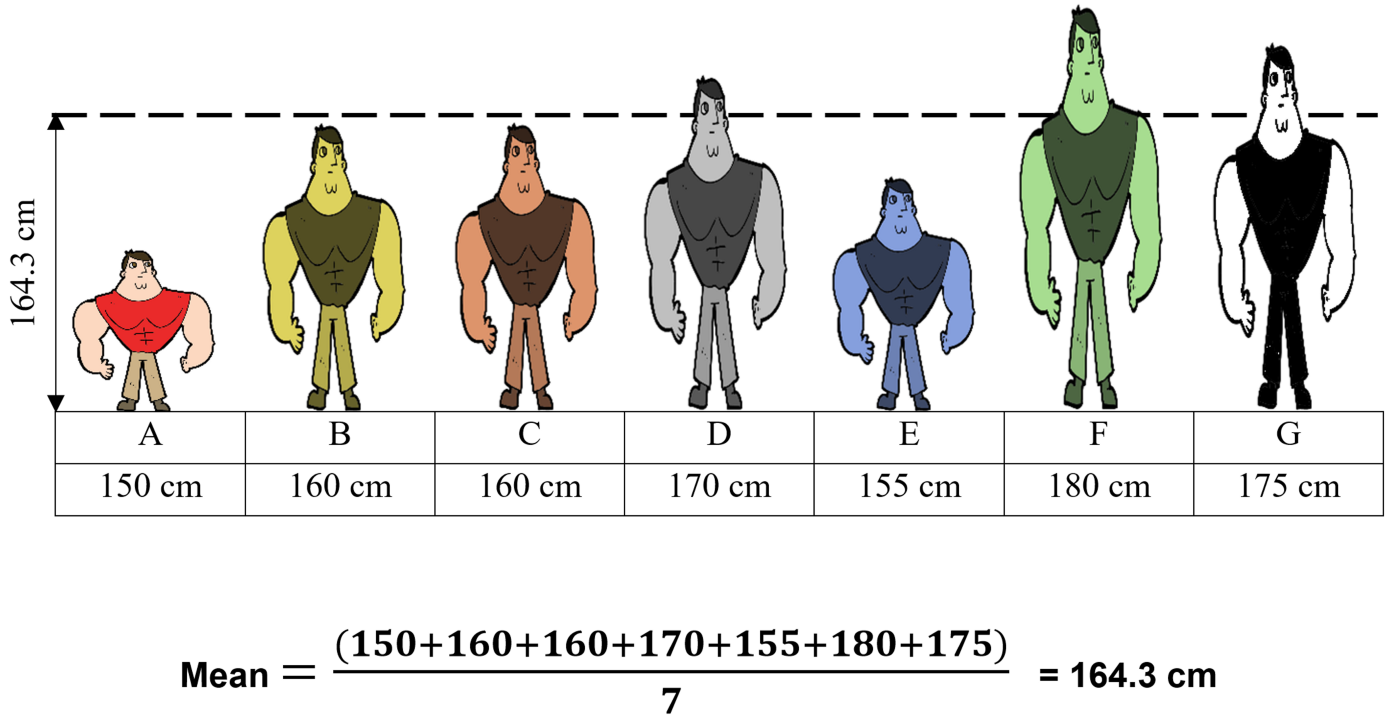

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [44]:
df.mean()

act379        0.189474
act13         0.042105
act279        0.326316
act323        0.378947
act363        0.052632
act302        0.010526
latitude     22.716464
longitude    75.855261
dtype: float64

#### We can also understand the mean using the below function. 

In [45]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [46]:
mean_cal(df, int64_lst)

,normal_value,zero_value
0,6,0


In [47]:
mean_cal(df,float64_lst)

,normal_value,zero_value
0,2,0


zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
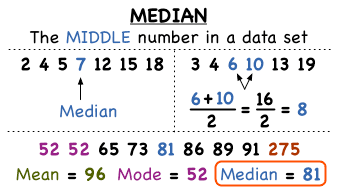

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.

In [48]:
df.median()

act379        0.000000
act13         0.000000
act279        0.000000
act323        0.000000
act363        0.000000
act302        0.000000
latitude     22.720000
longitude    75.860581
dtype: float64

####  We can also understand the median using the below function. 

In [49]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [50]:
median_cal(df, float64_lst)

,normal_value,zero_value
0,2,0


zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
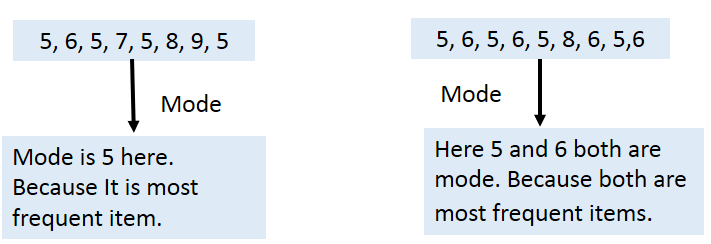
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [51]:
df.mode()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 19:00,0.0,0.0,0.0,0.0,0.0,0.0,22.670918,75.827524
1,4/3/2018 22:00,NaN,NaN,NaN,NaN,NaN,NaN,22.740600,75.850900


In [52]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [53]:
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,2,0,0


zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

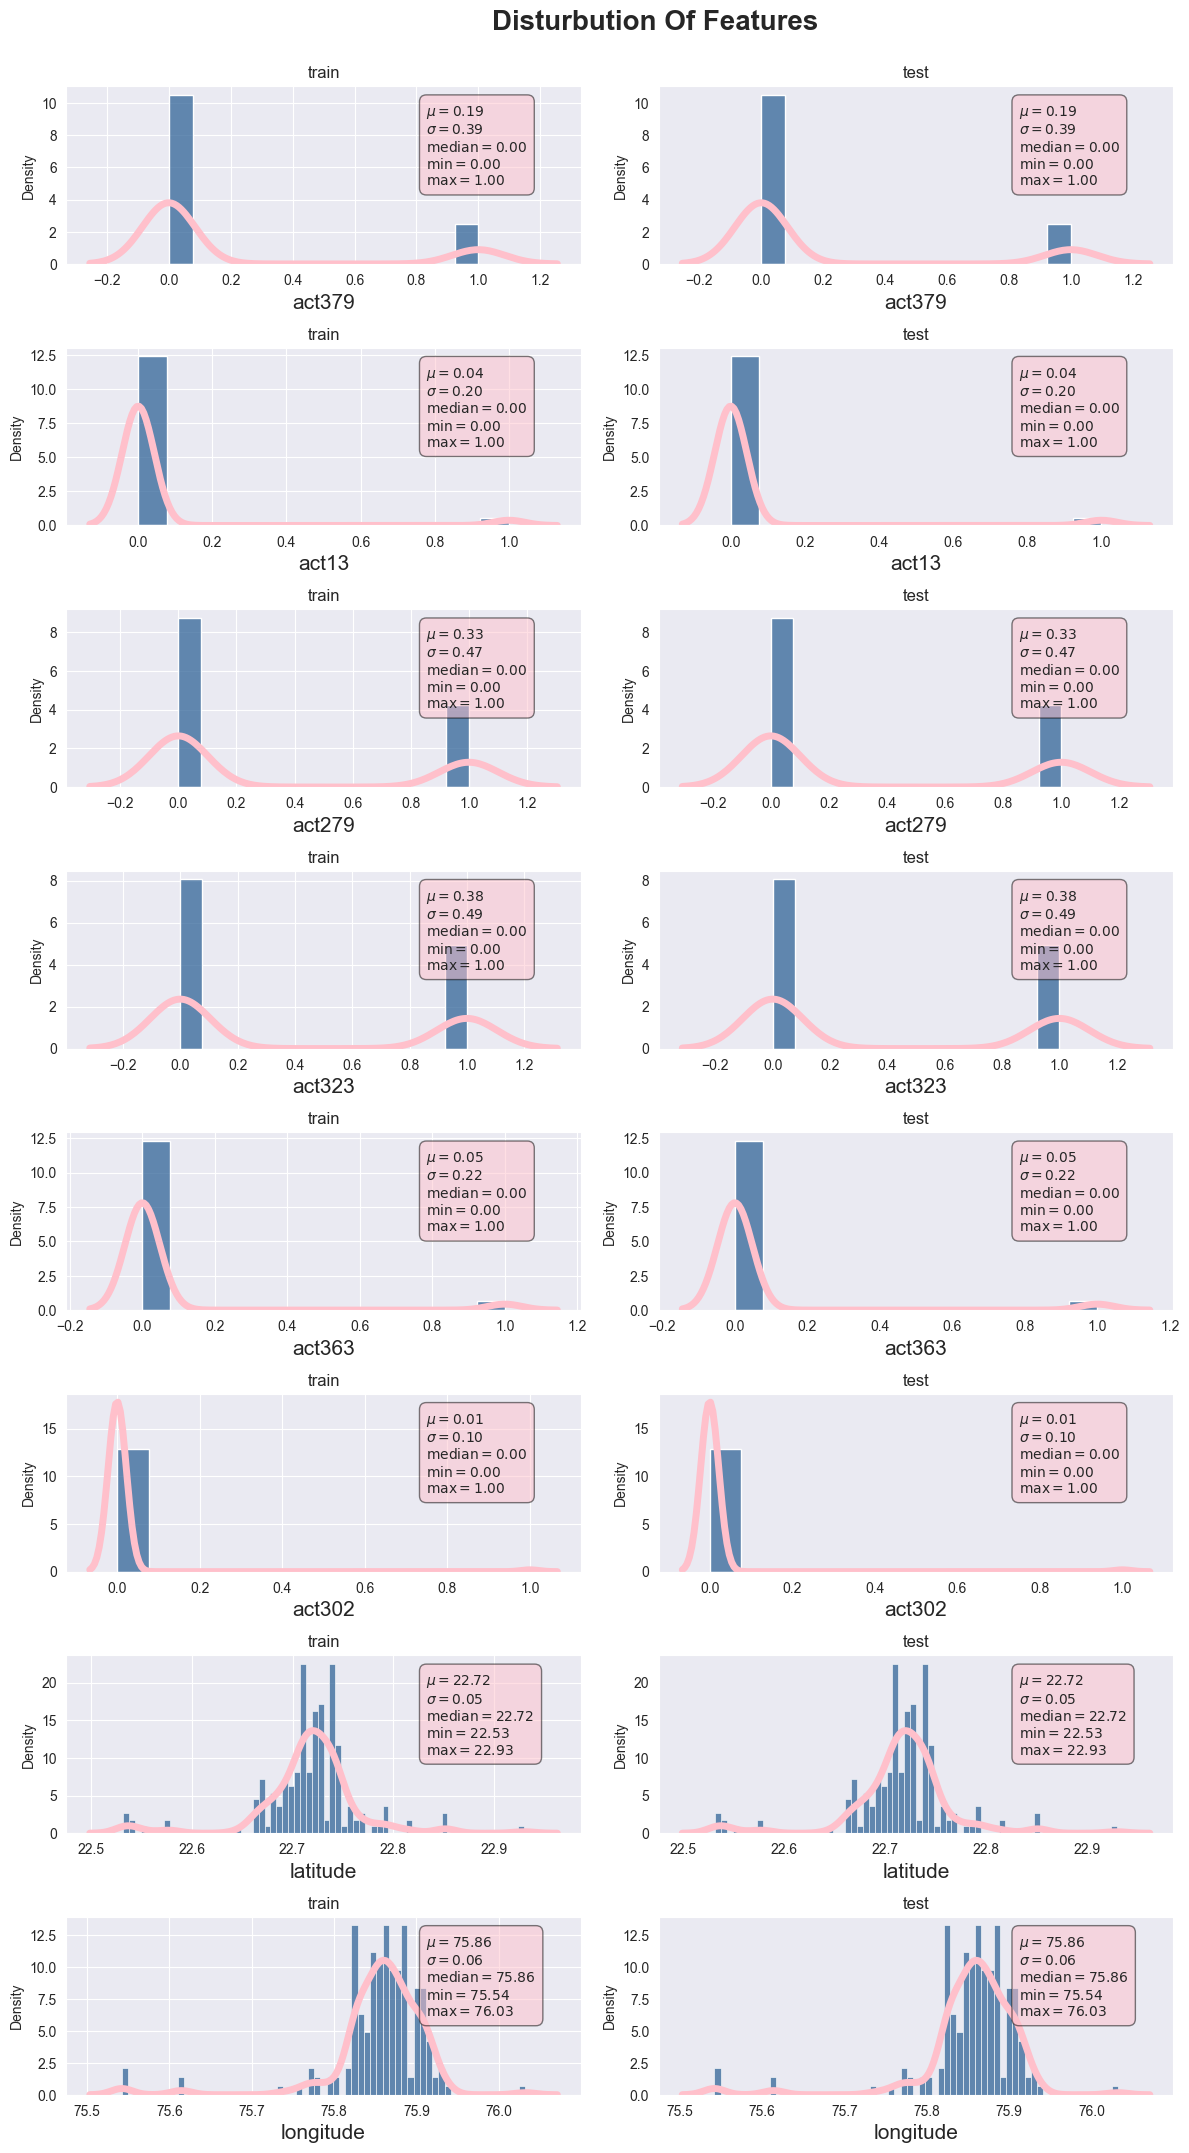

In [55]:
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(df.select_dtypes(include=['int64','int32','float64']).columns)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')
    
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    plt.grid()

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,fontweight = "bold")
plt.tight_layout()
plt.show()

# Null and Nan values

1. **Null Values**


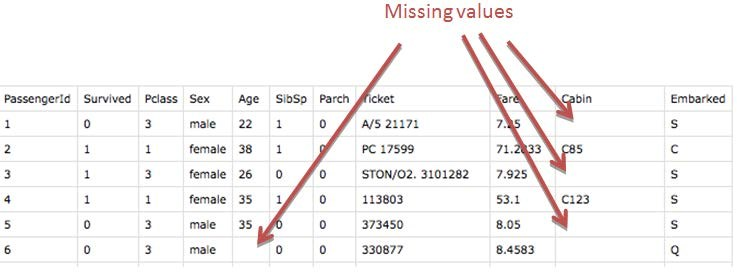

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [35]:
df.isnull().sum()

timestamp    0
act379       0
act13        0
act279       0
act323       0
act363       0
act302       0
latitude     0
longitude    0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

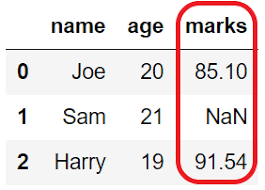

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [36]:
df.isna().sum()

timestamp    0
act379       0
act13        0
act279       0
act323       0
act363       0
act302       0
latitude     0
longitude    0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [37]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

timestamp  4/3/2018 22:00      33
28-02-2018 19:00    33
1/3/2018 18:35      22
3/3/2018 22:50      22
1/3/2018 18:25      22
                    ..
1/3/2018 8:55       11
1/3/2018 14:20      11
1/3/2018 0:55       11
1/3/2018 12:05      11
7/3/2018 23:45      11
Name: timestamp, Length: 170, dtype: int64


- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



In [38]:
df['timestamp']

0       28-02-2018 21:00
1       28-02-2018 21:15
2       28-02-2018 10:15
3       28-02-2018 10:15
4       28-02-2018 10:30
              ...       
2085       7/3/2018 3:50
2086      7/3/2018 21:10
2087      7/3/2018 12:10
2088      7/3/2018 10:35
2089      7/3/2018 23:45
Name: timestamp, Length: 2090, dtype: object

In [39]:
for i in range(len(df['timestamp'])):
    df['timestamp'][i]=df['timestamp'][i].replace('-','/')
    df['timestamp'][i]=df['timestamp'][i].replace('.',':')

In [40]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [41]:
# DATE TIME STAMP FUNCTION
column_1 = df['timestamp']

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [42]:
df=df.drop('timestamp',axis=1)

In [43]:
df=pd.concat([db,df],axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        2090 non-null   int64  
 1   month       2090 non-null   int64  
 2   day         2090 non-null   int64  
 3   hour        2090 non-null   int64  
 4   dayofyear   2090 non-null   int64  
 5   week        2090 non-null   int64  
 6   weekofyear  2090 non-null   int64  
 7   dayofweek   2090 non-null   int64  
 8   weekday     2090 non-null   int64  
 9   quarter     2090 non-null   int64  
 10  act379      2090 non-null   int64  
 11  act13       2090 non-null   int64  
 12  act279      2090 non-null   int64  
 13  act323      2090 non-null   int64  
 14  act363      2090 non-null   int64  
 15  act302      2090 non-null   int64  
 16  latitude    2090 non-null   float64
 17  longitude   2090 non-null   float64
dtypes: float64(2), int64(16)
memory usage: 294.0 KB


# Skewness 

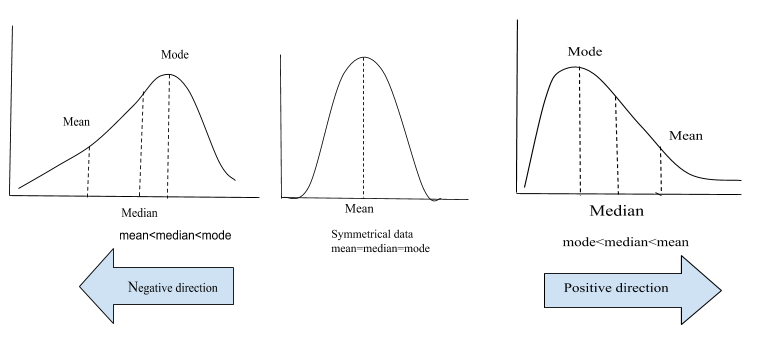

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [45]:
def right_nor_left(df, float64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)
        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [46]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [47]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,latitude,-0.7629,negative (-ve) skewed
1,longitude,-2.7804,negative (-ve) skewed


In [48]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,0,0,2


In [49]:
int64_cols = ['int64']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [50]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,year,0.0000,normal distrbution
1,month,0.3742,positive (+ve) skewed
2,day,1.1070,positive (+ve) skewed
3,hour,-1.0205,negative (-ve) skewed
4,dayofyear,0.2694,positive (+ve) skewed
5,week,0.2949,positive (+ve) skewed
6,weekofyear,0.2949,positive (+ve) skewed
7,dayofweek,1.0231,positive (+ve) skewed
8,weekday,1.0231,positive (+ve) skewed
9,quarter,0.7823,positive (+ve) skewed


In [51]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,14,1,1


We notice with the above results that we have following details:
1. 14 columns are positive skewed
2. 3 columns are negative skewed
3. 1 column is normal skewed.

### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

### What benefits does crime forecasting bring to areas where it is used?



Crime forecasting may reduce the incidence of violent crime in areas where a pattern can be identified for early warnings to prevent others from being victimized. These systems may also help to prevent police complications such as accidental shootings or excessive force when officers are having difficulties in interacting with members of the community for internal quality control that you can count on. Crime forecasting also helps departments to work with training facilities and universities for better research and training for better crime prevention over all. Criminal justice is an ever evolving area of study where new techniques emerge over time for better policing and to help officers to better police their areas with less force. Crime forecasting can help to define the needed resources within a community for better police coverage in more vulnerable areas too.



# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns
5. Pie Plot

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

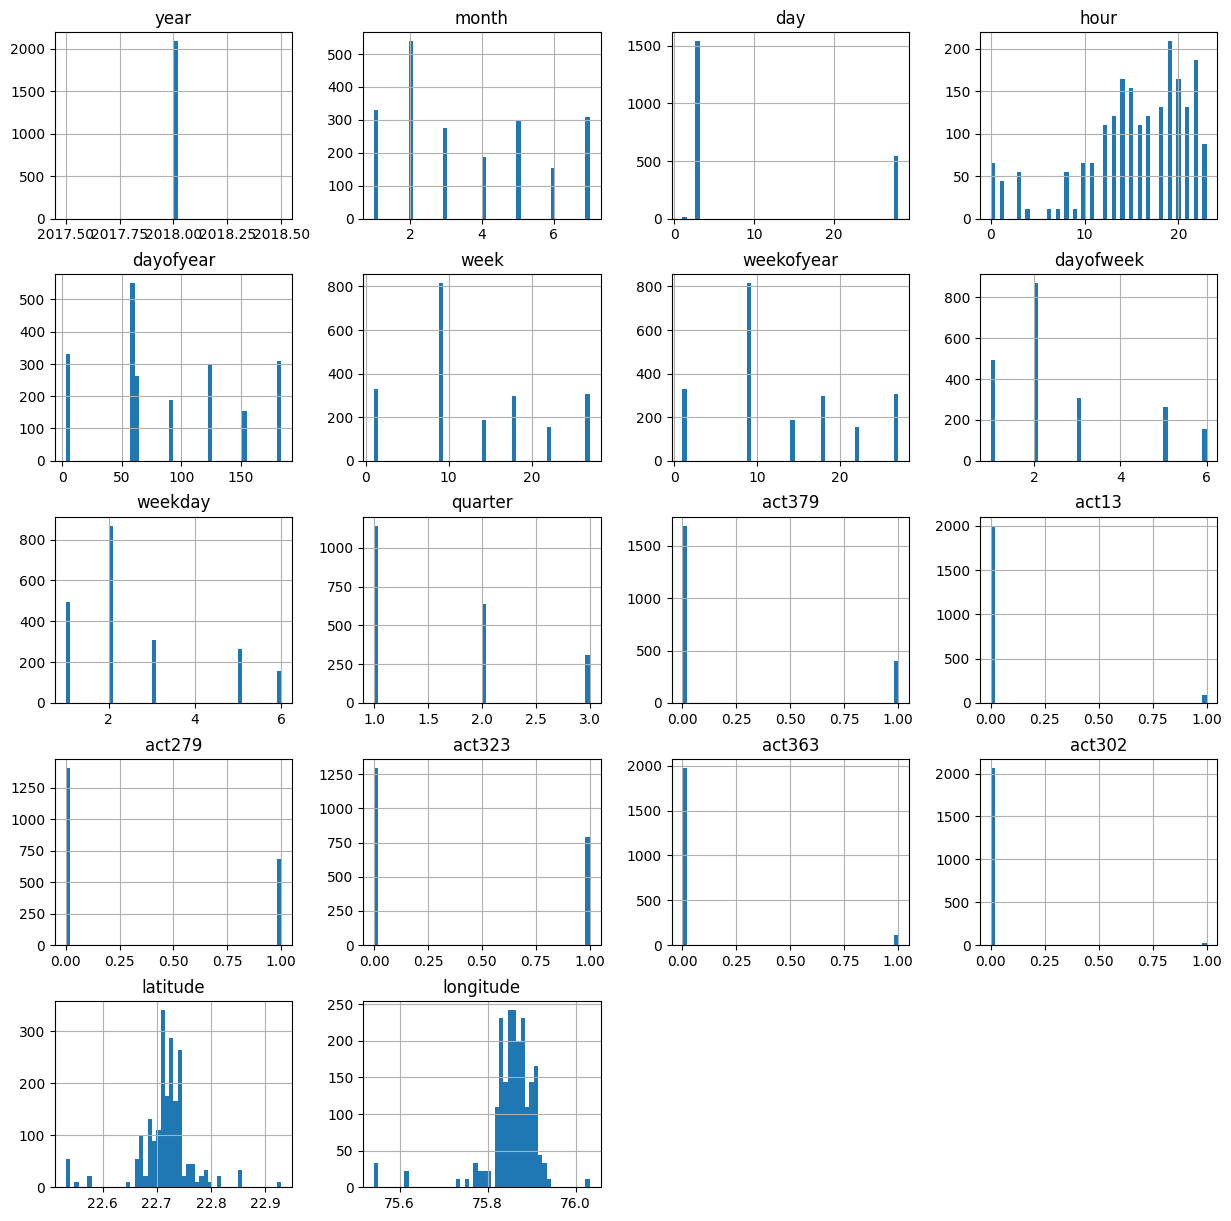

In [52]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,15))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

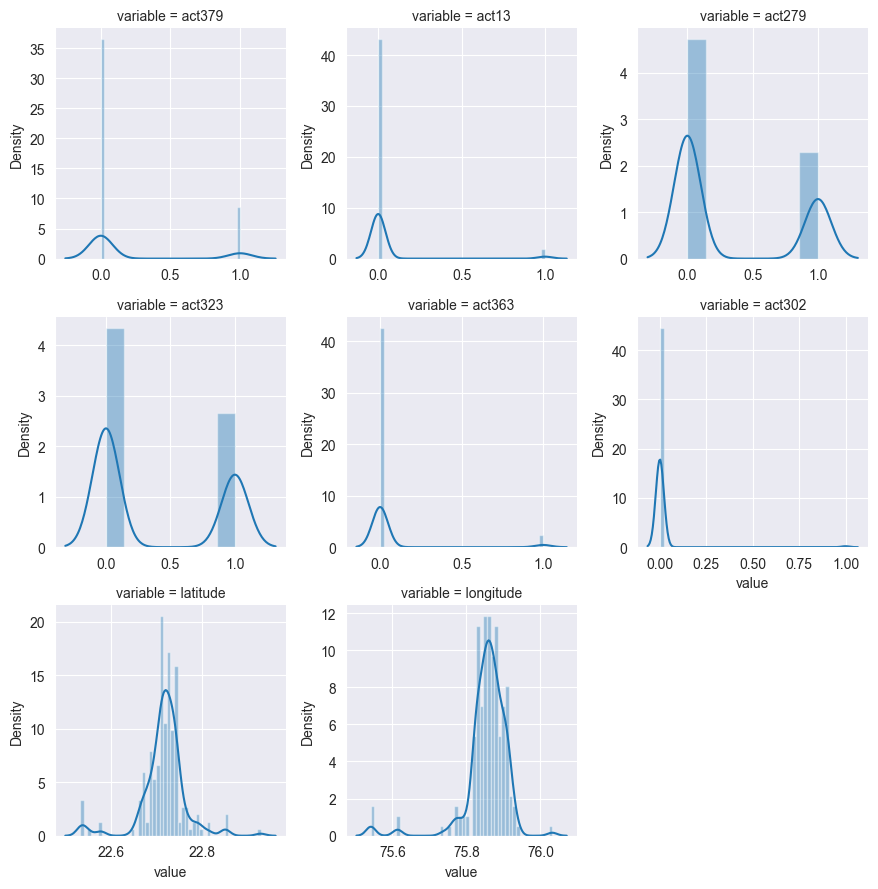

In [84]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=3, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 14 columns are positive skewed, 3 columns are negative skewed and 1 columns is normal.
2. The target variables are also +ve skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [54]:
#+ve skewed 
for i in int64_lst:
    print("Skewness of ",i,":",df[i].skew())
    print("--------------------------------------------")

Skewness of  act379 : 1.5859236122659062
--------------------------------------------
Skewness of  act13 : 4.563314799206212
--------------------------------------------
Skewness of  act279 : 0.7414040851732665
--------------------------------------------
Skewness of  act323 : 0.499415996108034
--------------------------------------------
Skewness of  act363 : 4.0098168596420205
--------------------------------------------
Skewness of  act302 : 9.599108276294325
--------------------------------------------


#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



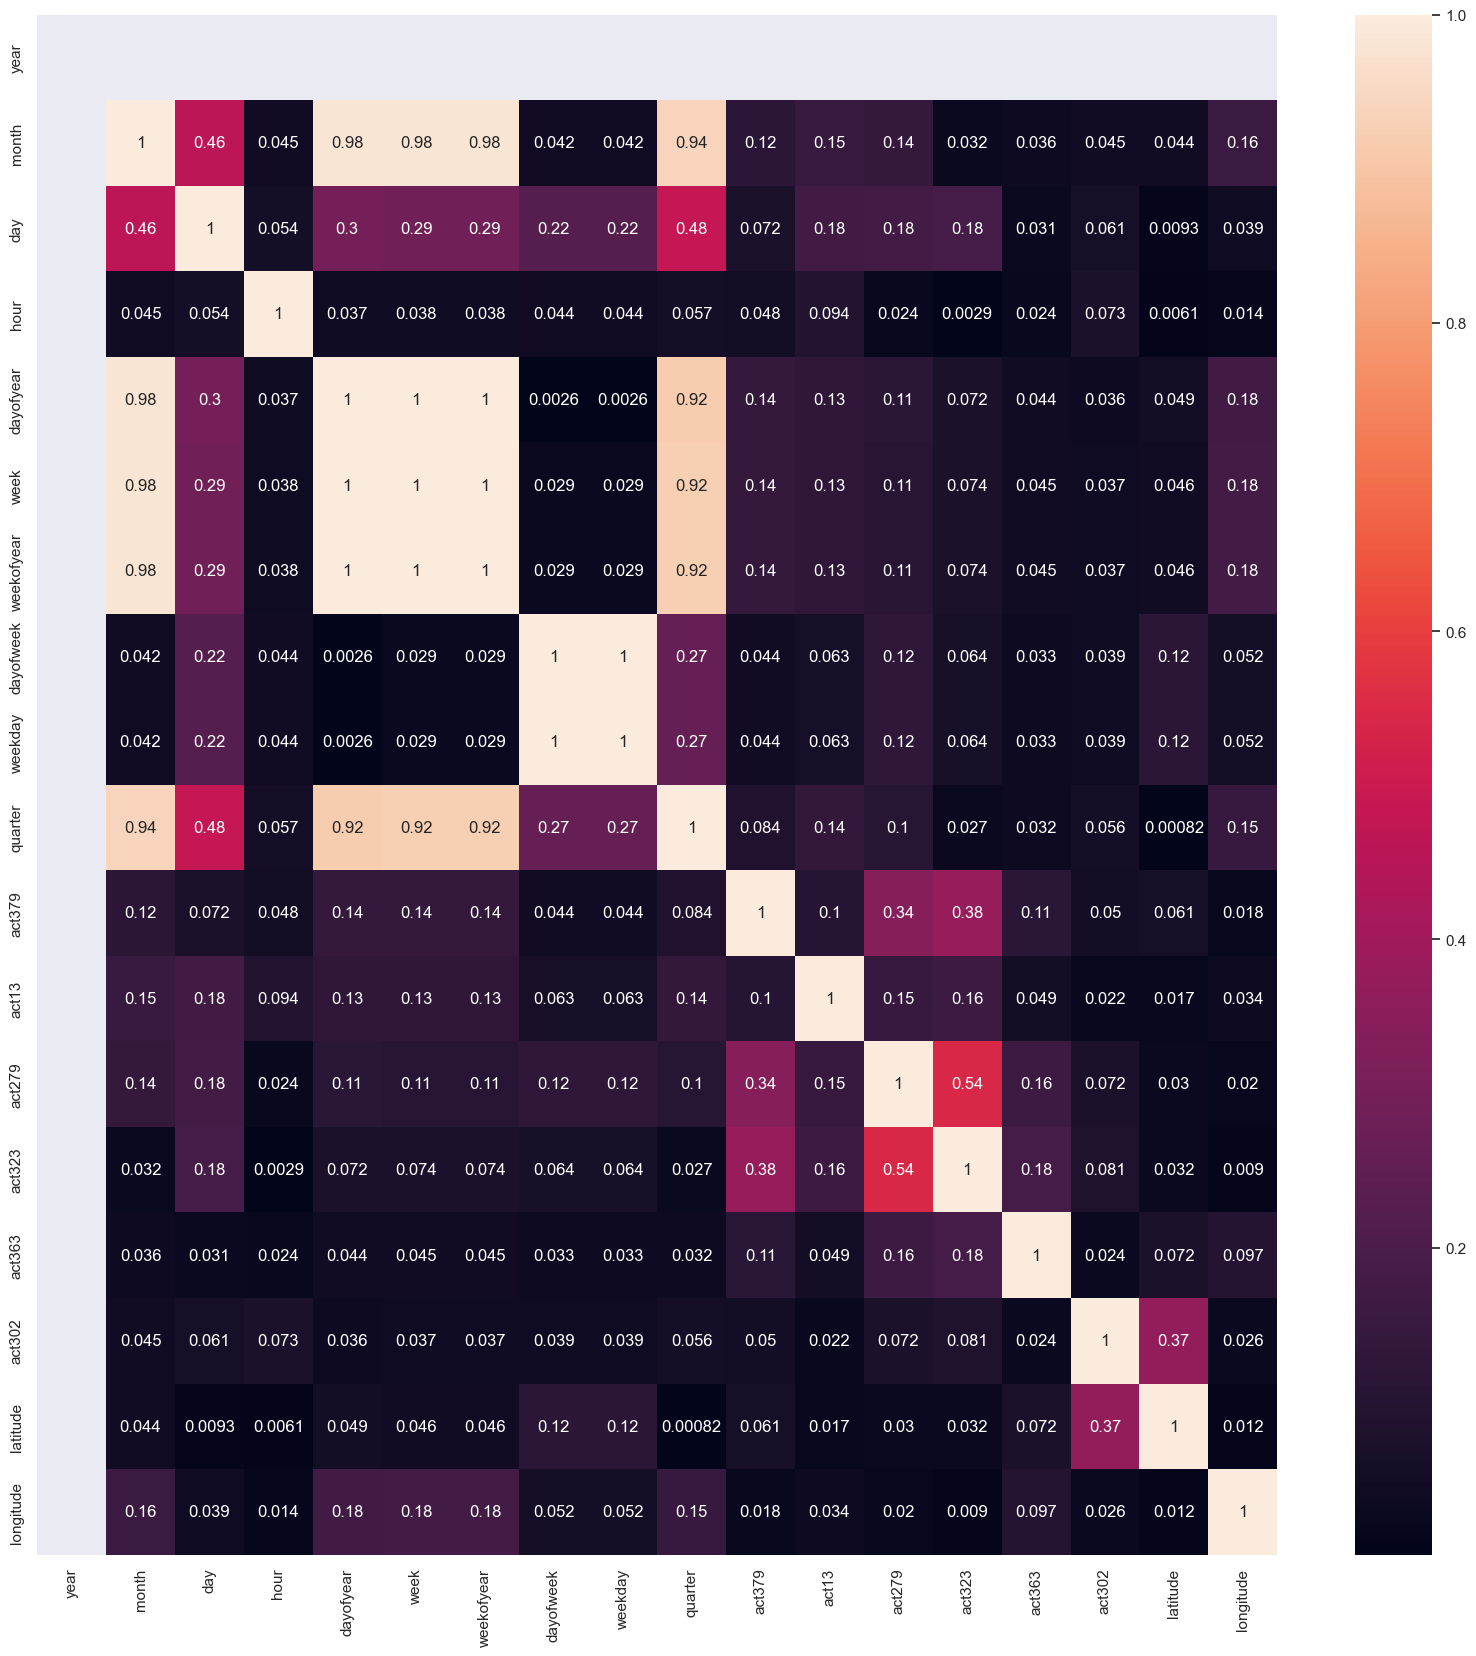

In [57]:
#correlation plot
sns.set(rc = {'figure.figsize':(20,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against diagnosis. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [58]:
for i in int64_lst:
    print (corr[i].sort_values(ascending=False)[-5:]) #last 5 values
    print ('----------------------')
    

hour         0.048152
weekday      0.044000
dayofweek    0.044000
longitude    0.018005
year              NaN
Name: act379, dtype: float64
----------------------
act363       0.049417
longitude    0.033757
act302       0.021624
latitude     0.017217
year              NaN
Name: act13, dtype: float64
----------------------
act302       0.071784
latitude     0.030324
hour         0.024119
longitude    0.020251
year              NaN
Name: act279, dtype: float64
----------------------
latitude     0.031546
quarter      0.026705
longitude    0.009002
hour         0.002916
year              NaN
Name: act323, dtype: float64
----------------------
quarter    0.032232
day        0.030945
act302     0.024311
hour       0.023973
year            NaN
Name: act363, dtype: float64
----------------------
dayofyear    0.035716
longitude    0.025795
act363       0.024311
act13        0.021624
year              NaN
Name: act302, dtype: float64
----------------------


In [59]:
corr

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.462916,0.044503,0.984022,0.982475,0.982475,0.042214,0.042214,0.939586,0.117883,0.152051,0.137813,0.032002,0.035732,0.044789,0.044212,0.155680
day,NaN,0.462916,1.000000,0.054274,0.297840,0.291720,0.291720,0.224358,0.224358,0.482587,0.072068,0.176019,0.178558,0.184928,0.030945,0.060664,0.009304,0.038753
hour,NaN,0.044503,0.054274,1.000000,0.036791,0.037953,0.037953,0.044092,0.044092,0.057374,0.048152,0.093674,0.024119,0.002916,0.023973,0.072778,0.006136,0.013813
dayofyear,NaN,0.984022,0.297840,0.036791,1.000000,0.999643,0.999643,0.002570,0.002570,0.916590,0.141295,0.128052,0.111885,0.071889,0.044295,0.035716,0.048927,0.175672
week,NaN,0.982475,0.291720,0.037953,0.999643,1.000000,1.000000,0.029282,0.029282,0.923286,0.140060,0.126323,0.108562,0.073568,0.045161,0.036749,0.045795,0.176999
weekofyear,NaN,0.982475,0.291720,0.037953,0.999643,1.000000,1.000000,0.029282,0.029282,0.923286,0.140060,0.126323,0.108562,0.073568,0.045161,0.036749,0.045795,0.176999
dayofweek,NaN,0.042214,0.224358,0.044092,0.002570,0.029282,0.029282,1.000000,1.000000,0.265251,0.044000,0.062688,0.122639,0.064023,0.033118,0.039235,0.116487,0.052455
weekday,NaN,0.042214,0.224358,0.044092,0.002570,0.029282,0.029282,1.000000,1.000000,0.265251,0.044000,0.062688,0.122639,0.064023,0.033118,0.039235,0.116487,0.052455
quarter,NaN,0.939586,0.482587,0.057374,0.916590,0.923286,0.923286,0.265251,0.265251,1.000000,0.084484,0.136186,0.104385,0.026705,0.032232,0.056419,0.000824,0.149038


### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

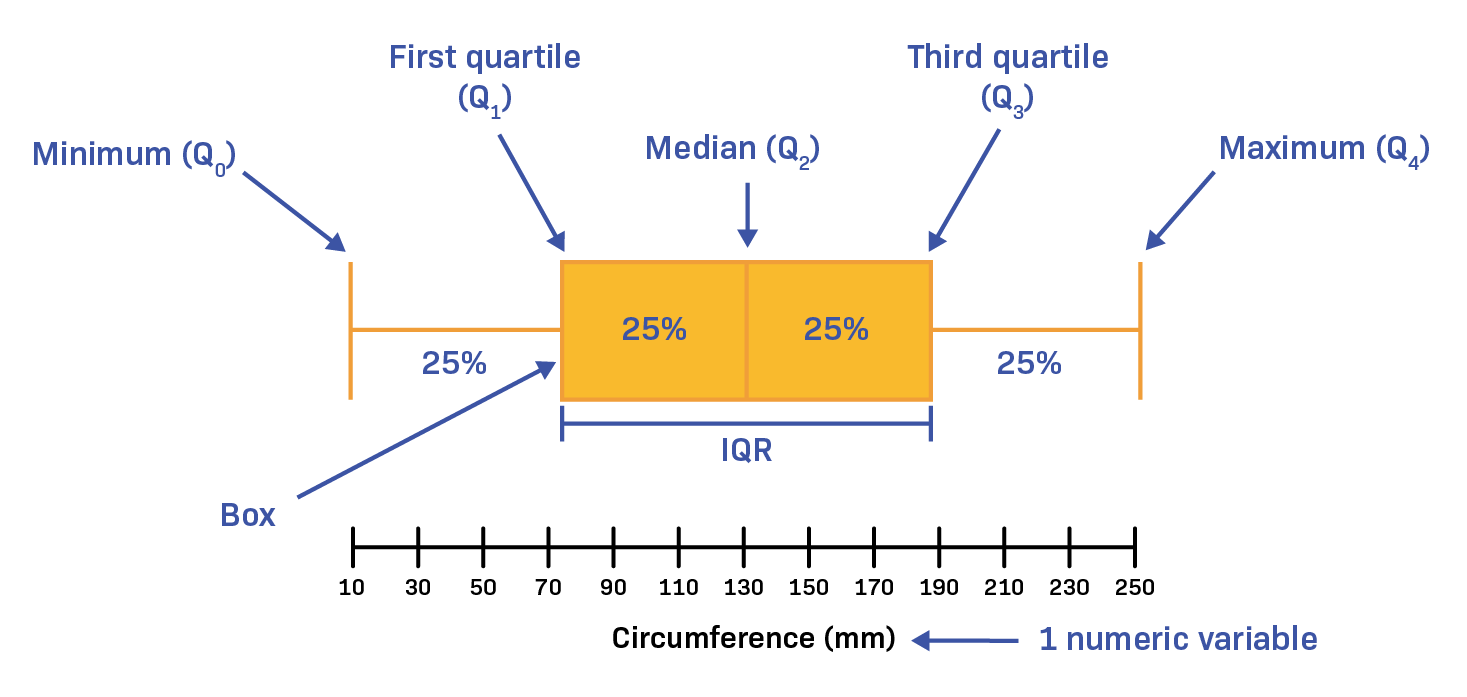

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [60]:
features =list(df.columns)
for i in int64_lst:
    features.remove(i)

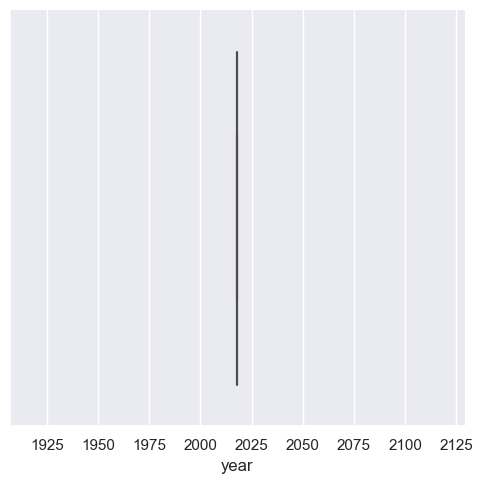

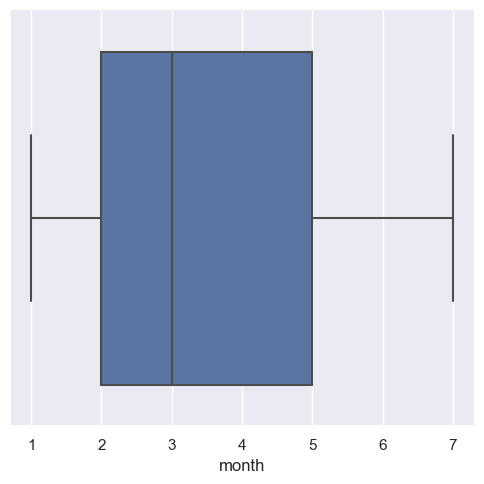

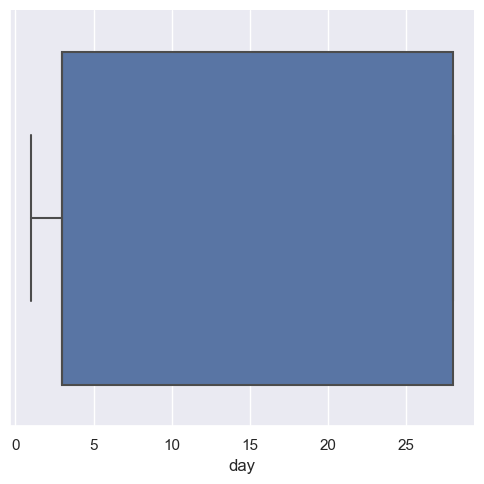

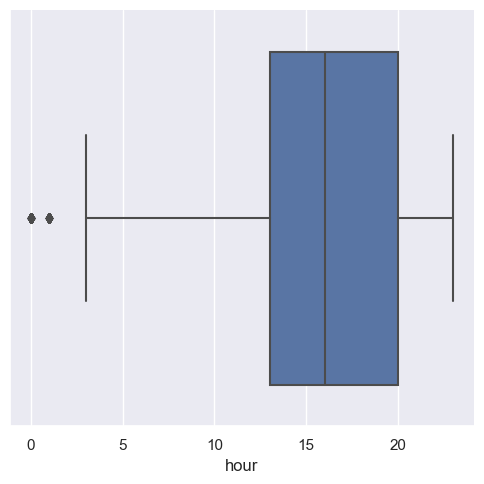

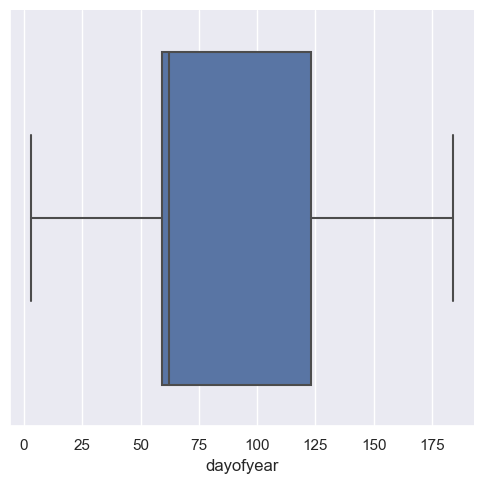

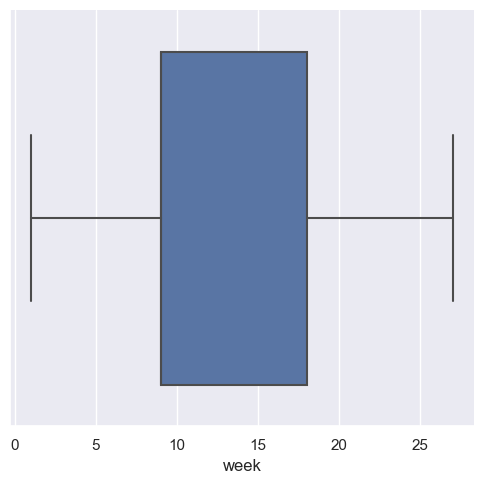

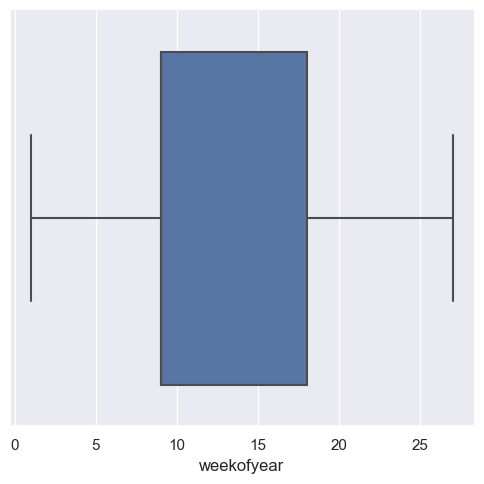

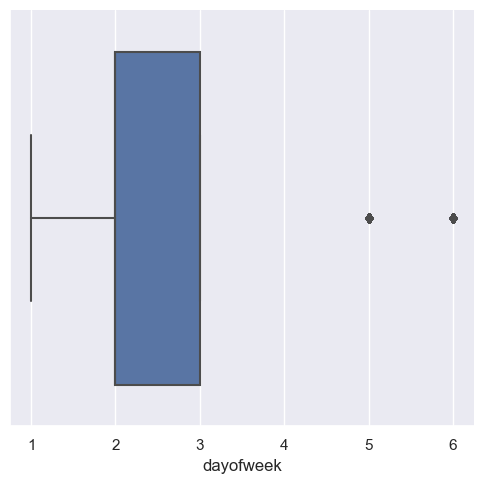

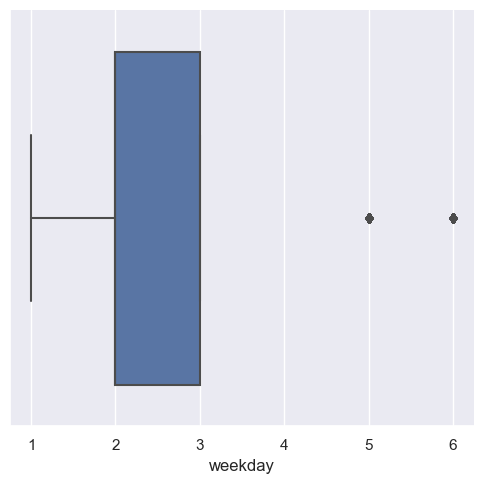

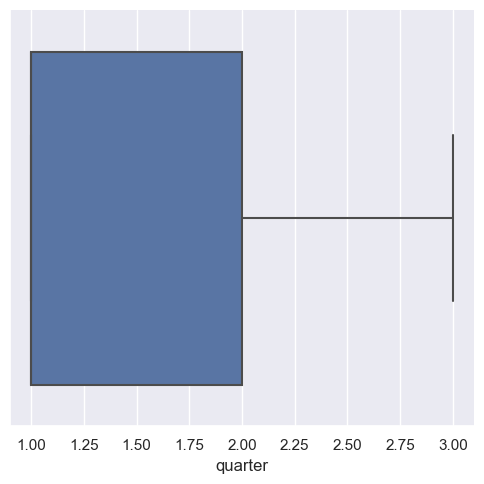

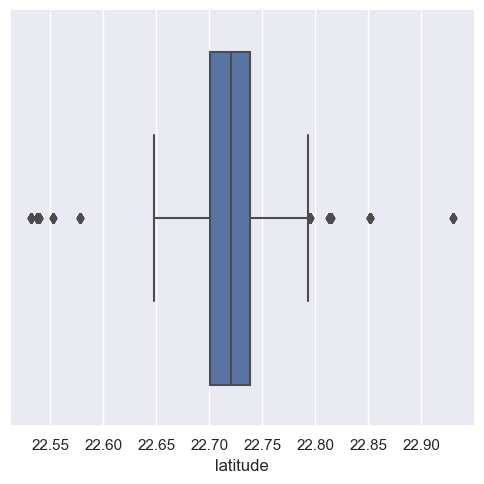

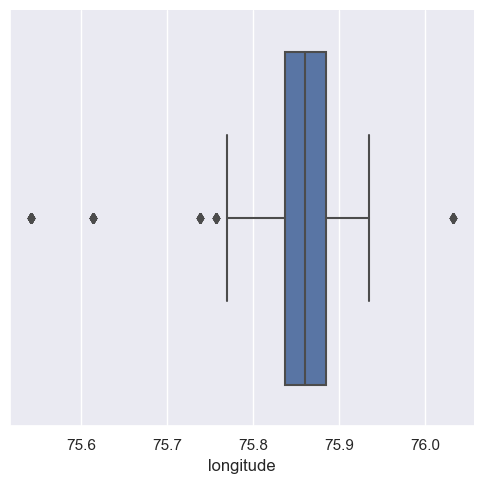

In [61]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

In [62]:
#for target variable
target =int64_lst

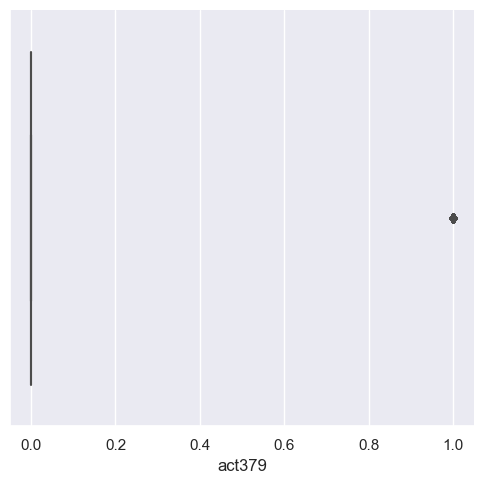

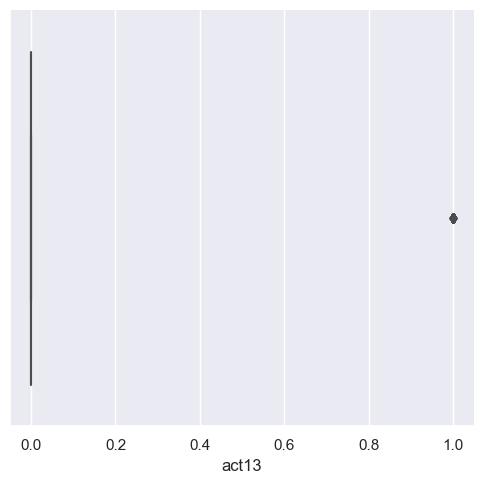

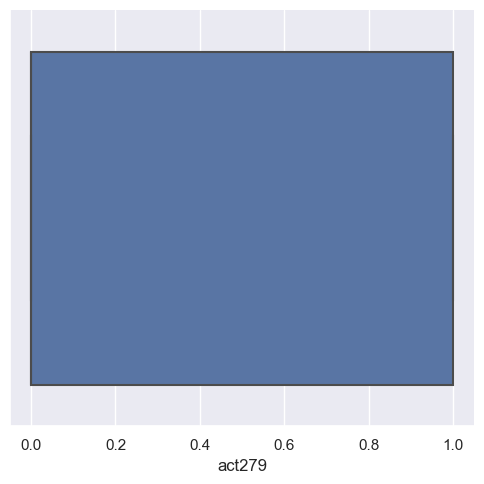

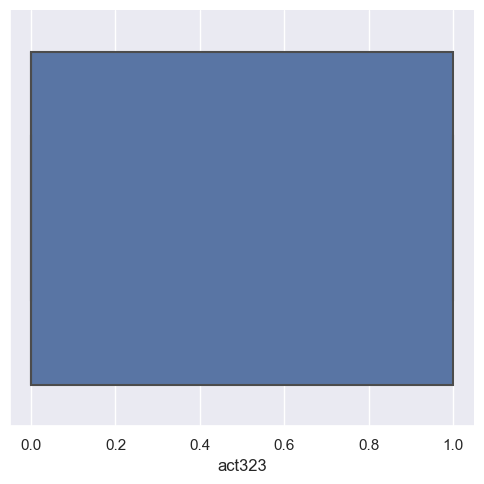

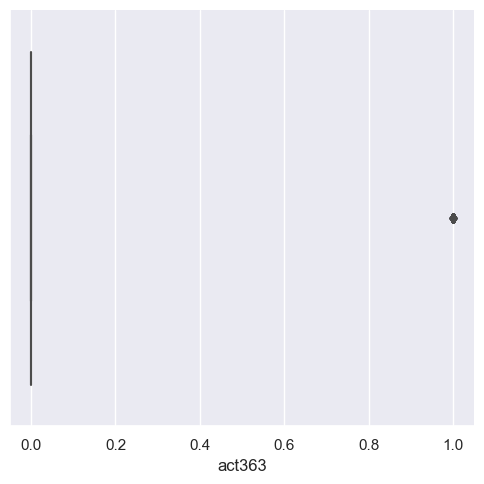

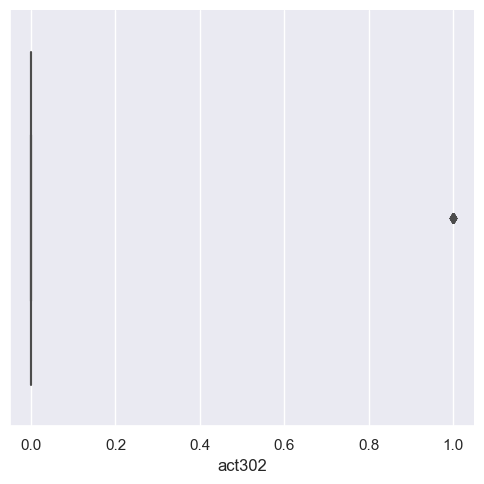

In [63]:
for value in target:
    sns.catplot(data=df, x=value,  kind="box")

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# 5. Pie Plot

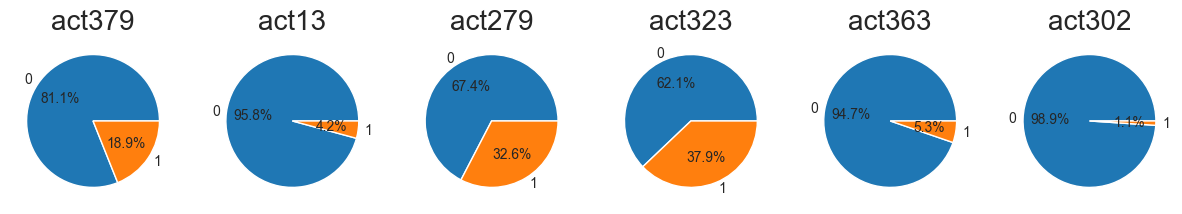

In [83]:
plt.subplots(figsize=(15, 15))
for i, col in enumerate(list(df.select_dtypes(include=['int64']).columns)):
    plt.subplot(1, 6, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    plt.title(col,fontsize=20)

plt.show()

#### Insight form above pie plot: -
- act379 occurs 18.9% cases.
- act13 occurs 4.2% cases.
- act279 occurs 32.6% cases.
- act323 occurs 37.9% cases.
- act363 occurs 6.3% cases.
- act302 occurs 1.1% cases.


# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [86]:
# Separate target and feature column in X and y variable

target = int64_lst

# X will be the features
X = df.drop(target,axis=1)
#y will be the target variable
y = df[target]

In [87]:
print(target)

['act379', 'act13', 'act279', 'act323', 'act363', 'act302']


y have target variable and X have all other variable.

#### Here in crime prediction act379, act13, act279, act323, act363, act302  is the target variable.

In [67]:
X

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,latitude,longitude
0,2018,2,28,21,59,9,9,2,2,1,22.737260,75.875987
1,2018,2,28,21,59,9,9,2,2,1,22.720992,75.876083
2,2018,2,28,10,59,9,9,2,2,1,22.736676,75.883168
3,2018,2,28,10,59,9,9,2,2,1,22.746527,75.887139
4,2018,2,28,10,59,9,9,2,2,1,22.769531,75.888772
...,...,...,...,...,...,...,...,...,...,...,...,...
2085,2018,7,3,3,184,27,27,1,1,3,22.712970,75.823580
2086,2018,7,3,21,184,27,27,1,1,3,22.693481,75.821483
2087,2018,7,3,12,184,27,27,1,1,3,22.531931,75.769126
2088,2018,7,3,10,184,27,27,1,1,3,22.719569,75.857726


In [68]:
y

,act379,act13,act279,act323,act363,act302
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
2085,0,0,0,1,0,0
2086,0,0,0,1,0,0
2087,0,0,1,0,0,0
2088,0,0,1,0,0,0


In [69]:
# Check the shape of X and y variable
X.shape, y.shape

((2090, 12), (2090, 6))

In [70]:
# Again check the shape of X and y variable
X.shape, y.shape

((2090, 12), (2090, 6))

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [71]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [72]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1672, 12), (418, 12), (1672, 6), (418, 6))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm**

__Algorithms we are going to use in this step__

1. RandomForestRegressor
2. KNearest Neighbor
3. Random Forest Classification

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [73]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. RandomForestRegressor

Random Forest Regression algorithms are a class of Machine Learning algorithms that use the combination of multiple random decision trees each trained on a subset of data. The use of multiple trees gives stability to the algorithm and reduces variance. The random forest regression algorithm is a commonly used model due to its ability to work well for large and most kinds of data.

#### Train set cross-validation 

In [74]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.ensemble import RandomForestRegressor

log_R = RandomForestRegressor() #Object Creation

log_R.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


0.9754562313428585

In [76]:
#Accuracy of test data
log_R.score(X_test, y_test) 

0.9683622216333377

In [77]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.0200877 , 0.02726539, 0.03090943, 0.02238873, 0.01957424,
       0.01319673, 0.03421005, 0.02427607, 0.02875327, 0.03420758])

In [78]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.025486917304008806

### Prediction 

Now we will perform prediction on the dataset using Random Forest Regressor.

In [79]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

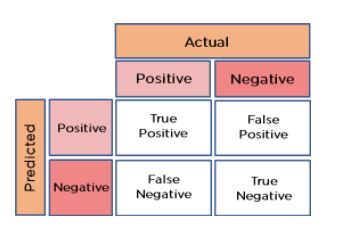

#### This diagram helps in understanding the concept of confusion matrix. 

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [81]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score  


print("The model used is RandomForestRegressor")
  
rr_acc = r2_score(y_test, y_predicted)*100
print("R2 Score is: -")
print()
print(rr_acc)

The model used is RandomForestRegressor
R2 Score is: -

96.83622216333377


# 2. K Nearest Neighbour

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm

In [82]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.9892344497607656

In [84]:
#Accuracy of test data
classifier.score(X_test, y_test) 

0.9904306220095693

In [85]:
#Get kfold values
Nn_scores = -1 * cross_val_score(classifier, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Nn_scores


array([0.03636965, 0.        , 0.05158822, 0.02579411, 0.02579411,
       0.02579411, 0.04467671, 0.03647838, 0.02579411, 0.04467671])

In [86]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.0316966082212219

### Prediction

Now we will perform prediction on the dataset using K Nearest Neighbour.

In [87]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [88]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score  


print("The model used is KNeighbors Classifier")
  
k_acc = r2_score(y_test, y_predicted)*100
print("R2 Score is: -")
print()
print(k_acc)

The model used is KNeighbors Classifier
R2 Score is: -

95.19099330794518


# 3. Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python.

Random Forest and Decision Tree Algorithm are considered best for the data that has outliers.

In [89]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [90]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

0.9904306220095693

In [91]:
#Accuracy of test data
clas.score(X_test, y_test) 

0.9856459330143541

In [92]:
# Get kfold values
Dta_scores = -1 * cross_val_score(clas, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Dta_scores


array([0.02571722, 0.04454354, 0.04467671, 0.03647838, 0.02579411,
       0.        , 0.04467671, 0.04467671, 0.04467671, 0.04467671])

In [93]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.03559167758789146

### Prediction 

Now we will perform prediction on the dataset using Random Forest Classifier.

In [94]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [95]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score  
  

print("The model used is Random Forest Classifier")
  
r_acc = r2_score(y_test, y_predicted)*100
print("R2 Score is: -")
print()
print(r_acc)

The model used is Random Forest Classifier
R2 Score is: -

92.78648996191775


# Insight: -

In [96]:
cal_metric=pd.DataFrame([rr_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Random Forest Regressor',
                  'K-nearest Neighbors',
                  'Random Forest Classifier']
cal_metric

,Score in percentage
Random Forest Regressor,96.836222
K-nearest Neighbors,95.190993
Random Forest Classifier,92.786490



- As you can see with our RandomForestRegressor(0.9683 or 96.83%) we are getting a better result even for the recall (0.9519 or 95.19%) which is the most tricky part.
- So we gonna save our model with Random Forest Algorithm

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [97]:
import pickle
pickle.dump(log_R , open('crime_prediction_rr.pkl', 'wb'))
pickle.dump(classifier , open('crime_prediction_k.pkl', 'wb'))
pickle.dump(clas , open('crime_prediction_r.pkl', 'wb'))

In [98]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('crime_prediction_rr.pkl', 'rb'))
    crimes = str(list(pickled_model.predict(features)))
    
    return str(f'The crime analysis is {crimes}')

#### We can test our model by giving our own parameters or features to predict. 

In [100]:
year = 2018
month = 2
day = 28
hour = 21
dayofyear = 59
week = 9
weekofyear = 9
dayofweek =  2
weekday = 2
quarter = 1
latitude = 22.720992
longitude = 75.876083

In [101]:
model_prediction([[year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,latitude,longitude]])

'The crime analysis is [array([1., 0., 0., 0., 0., 0.])]'

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to classify crime based on location and analysis of crime in indore. The above model helps in classifying and analysis the crime. The accuracy for the prediction is 96.83%.